In [1]:
%%html
<script src="https://kit.fontawesome.com/751ade44c1.js" crossorigin="anonymous"></script>

<style>
:root {
    --red: #d9534f;
    --yellow: #f0ad4e;
    --green: #5cb85c;
    --blue: #0275d8;
    --light-blue: #5bc0de;
    --dark-blue: #073b4c;
    --purple: #6A4C93;
}
    
.important {
    color: var(--yellow);
}

.optional {
    color: var(--green);
}
</style>


# <i class="fas fa-circle optional"></i> Plotting with Matplotlib
<span class="badge badge-pill badge-success">optional</span><span class="badge badge-pill badge-dark">notebook</span>

This exercise gives you a thorough introduction to Matplotlib, which is a library you will be using throughout the course and likely in the future as well. It is the standard for high-quality plots in Python and has a very stable API. Later, we will also introduce **Seaborn**, a library that exposes a more high-level plotting API for easy creation of certain plot types. Matplotlib supports several desktop GUI environments as well as Jupyter notebooks.

We cover the following topics in this exercise:
* Basic plotting of functions and data points.
* Styling of plots.
* Combining multiple plots.
* Saving plots to disk.


## Numpy array creation
We start with a short detour into array creation. There are many convenience functions built into Numpy that will make your life a lot easier when creating new arrays. We the most important of them here for the sake of reference (read more about array creation [here](https://docs.scipy.org/doc/numpy-1.15.0/user/basics.creation.html))

* `np.ones(size)`, `np.zeros(size)`: Create an array of size `size` with either all ones or zeros. These are extremely useful when creating masks (starting with an empty array) or arrays of constant values.
* `np.linspace(start, stop, num)`, `np.arange(start, stop, step)`: Create 1d arrays of ranges from `start` to `stop` (inclusive) using either interpolation to create `num` elements in the case of `linspace` or using a certain `step`-size in `arange`.
* `np.random.uniform(size)`, `np.random.normal(loc, scale, size)`: Create arrays with random elements drawn either from a uniform or normal/Gaussian distribution. For the gaussian, `loc`=$\mu$ (mean) and `scale`=$\sigma$ (standard deviation).

Don't worry if this is a bit confusing, just learn about each function when you need it. We have included some code below for easy experimentation:


In [1]:
import numpy as np


In [2]:
a_ones = np.ones((2, 2))
a_zeros = np.zeros((2, 2))
a_linspace = np.linspace(0, 10, 5)
a_arange = np.arange(0, 10, 2)
a_uniform = np.random.uniform((2, 2))
a_normal = np.random.uniform((2, 2))

print('ones:\n', a_ones)
print('zeros:\n', a_zeros)
print('linspace:\n', a_linspace)
print('arange:\n', a_arange)
print('uniform:\n', a_uniform)
print('normal:\n', a_normal)


ones:
 [[1. 1.]
 [1. 1.]]
zeros:
 [[0. 0.]
 [0. 0.]]
linspace:
 [ 0.   2.5  5.   7.5 10. ]
arange:
 [0 2 4 6 8]
uniform:
 [1.02677559 1.42732242]
normal:
 [1.03995351 1.82900685]


## Basics
Back to Matplotlib! We start by importing the library:


In [3]:
import matplotlib.pyplot as plt


Notice that we import the `pyplot` module. This module exposes a simple stateful API for creating and manipulating plots using functions. Matplotlib also supports and object oriented API but `pyplot` is much more widespread and, in our opinion, easier to work with.

The plotting functions you will use the most are `plot` and `scatter`. `plot` is typically used for creating connected line segments described by x and y data. `scatter` is used for plotting individual points, e.g. from a dataset. 

Take a look at the following sample plot code and output:


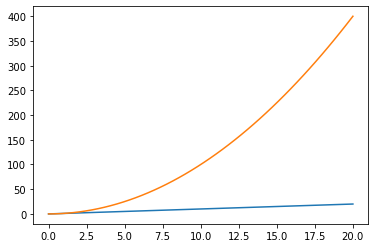

In [4]:
x_range = np.linspace(0, 20, 50) 
y_linear = x_range
y_quadratic = x_range**2

plt.plot(x_range, y_linear)
plt.plot(x_range, y_quadratic);


**Notes:**
* We demonstrate a typical use of `np.linspace`: to create x-axis values for graphical plots of functions.
* Notice how `y_quadratic` is created using elementwise exponentiation.

### Task (A)
1. Create an array of x-values in the interval $]-10, 10[$ using `np.linspace` (the number of elements isn't that important).
2. Implement the code for the `sigmoid` function below. Use the mathematical definition of the sigmoid function as a base $S(x) = \frac{1}{1+e^{-1}}$. 
3. Create an array of y-values by transforming the x-value array using the `sigmoid` function.
4. Plot the result using `plt.plot`.

**Hints:**
* Numpy provides a function `np.exp(x)`=$e^x$ that makes calculation of exponentials simpler.
* Use last week's Jupyter exercise for inspiration on how to create functions with Numpy arrays.
* Since Jupyter automatically outputs the last value returned in a cell, the `plt.plot` and similar functions return some text describing a figure object. This is simply the return value of the function and can be hidden by appending a `;` to the last call in a cell.


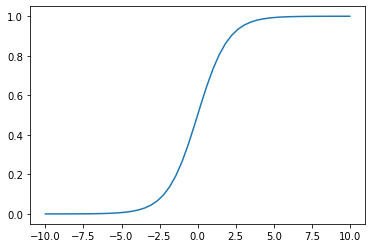

In [5]:
def sigmoid(x):
    ...


Scatter plots work similarly but only plot the points without connections. In the example below, we create a quadratic function from the previously defined `x_range` and then add normally distributed random noise to it. You will plot the noisy points yourself.

### Task (B)
1. Plot the `y_noise` variable using the `plt.plot` function.
2. Then change the function to `plt.scatter`. Which do you think is more useful in this situation? *Note: There is no correct answer as such.*


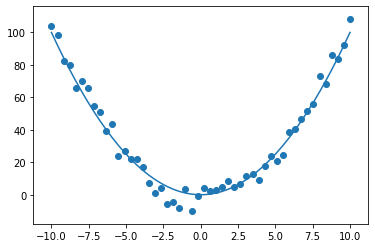

In [6]:
y_values = x_range**2

noise = np.random.normal(scale=5, size=50)
y_noise = y_values + noise

# Write solution here


## Styling
Matplotlib allows customisation of all visual aspects of the plots. We first show how individual lines or point series can be customised. Here's a short overview of the functionality:

* `plt.plot` takes a third argument, `format`, which is used to adapt the styling of lines. Generally, a letter designating a color (e.g. `r`,`g`,`b`) and a symbol designating line or point style (e.g. `+`, `--`) are combined to produce a format, e.g. `r+` to create red crosses. 
* `plt.scatter` takes an argument `c` for the color (can be letter form or complete color names) and an argument `marker` for the marker style (e.g. `+`, `o`).

See the documentation for [plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html) and [scatter](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html) for additional details. We have also included a small example here:


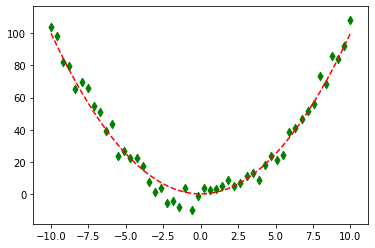

In [7]:
plt.plot(x_range, y_values, 'r--')
plt.scatter(x_range, y_noise, c='green', marker='d');


### Task (C)
1. Change the line plot to a blue solid line.
2. Change the scatter plot to plusses.
3. Remove the explicit colors from both plots. What is the result?

Although it is possible to change colors manually, Matplotlib automatically assigns colors to lines and point series using an internally defined `style`. The current style can be changed permanently using `plt.style.use(style)` or inside a `with` block using `plt.style.context(style)`. A reference of built-in stylesheets can be found [here](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html). We also show a simple example:


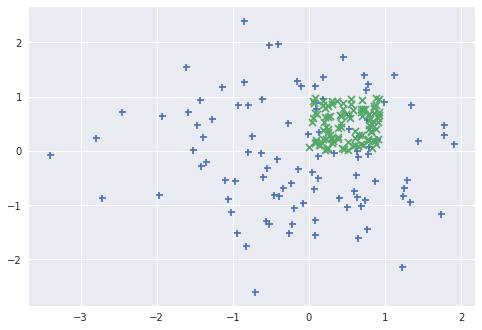

In [8]:
# We create some normal and uniformly distributed noise. Notice how even Numpy
# arrays can be destructured!
xs, ys = np.random.normal(size=(2, 100))
xu, yu = np.random.uniform(size=(2,100))

with plt.style.context('seaborn'):
    plt.scatter(xs, ys, marker='+')
    plt.scatter(xu, yu, marker='x')


### Task (D)
1. Find and try out another style from the reference page.

You can add extra features such as a legend, title, and axis labels to plots easily. We provide an overview and a simple example. 
* `plt.legend(titles)`: Creates a legend using a list of `titles` for the names. Previously plotted elements are added in order.
* `plt.suptitle(title)`: Set plot title using string `title`.
* `plt.ylabel(name)`/`plt.xlabel(name)`: Set plot axis labels.


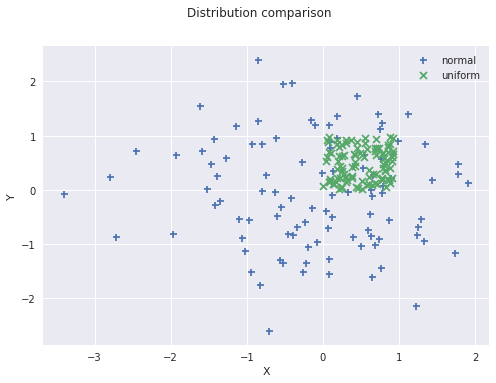

In [9]:
with plt.style.context('seaborn'):
    plt.scatter(xs, ys, marker='+')
    plt.scatter(xu, yu, marker='x')
    plt.legend(['normal', 'uniform'])
    
    plt.suptitle('Distribution comparison')
    plt.ylabel('Y')
    plt.xlabel('X')


## Combining plots
Matplotlib makes it possible to combine multiple plots, a feature you will likely use often. This will introduce some more object-oriented aspects but the API luckely remains largely the same. 

To create a plot with multiple sub-plots, use the function `plt.subplots` (documentation [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)). This is similar to `plt.figure` used in regular Python scripts for creating a new Matplotlib figure. The function returns a *figure* object and an array of *axes* objects. These are then used to fill in each subplot, add titles, and so forth. Examine the code below for a usage sample:


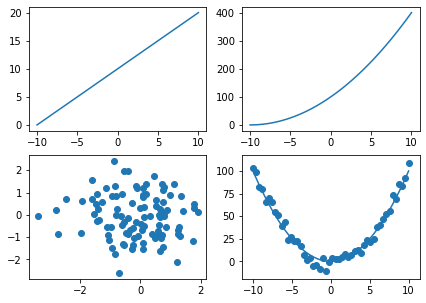

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(7, 5))

ax[0, 0].plot(x_range, y_linear)
ax[0, 1].plot(x_range, y_quadratic)
ax[1, 0].scatter(xs, ys)



### Tasks (E)
1. Add the quadratic and noise plots to the lower right plot (`ax[1, 1]`)


## Saving plots
When writing reports it is extremely useful to be able to save a Matplotlib plot. When using the GUI version of Matplotlib in regular Python scripts, it is possible to save directly from the plot GUI. It is, however, more convinient to save the output programatically. 

To save a plot, simply call `fig.savefig(output_path)` on a *figure* object. The object can either be obtained from a `plt.subplots` or `plt.figure` call, or using the function `plt.gcf()`. We show a few examples:


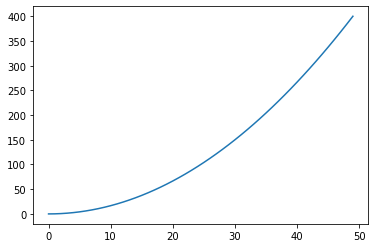

In [11]:
plt.plot(y_quadratic)

plt.gcf().savefig('outputs/s.pdf')
